# Problem statement

We have data from a Portuguese bank on details of customers related to selling a term deposit
The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio

# Data dictionary

**Bank client data**
* 1 - age 
* 2 - job : type of job 
* 3 - marital : marital status
* 4 - education 
* 5 - default: has credit in default? 
* 6 - housing: has housing loan? 
* 7 - loan: has personal loan?
* 8 - balance in account

**Related to previous contact**
* 8 - contact: contact communication type
* 9 - month: last contact month of year
* 10 - day: last contact day of the month
* 11 - duration: last contact duration, in seconds*

**Other attributes**
* 12 - campaign: number of contacts performed during this campaign and for this client
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign
* 14 - previous: number of contacts performed before this campaign and for this client
* 15 - poutcome: outcome of the previous marketing campaign

**Output variable (desired target):has the client subscribed a term deposit?**



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# To enable plotting graphs in Jupyter notebook
import seaborn as sns

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
bank_df = pd.read_csv("bank-full.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Deliverable – 1 (EDA)

### Univariate

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Numerical columns**

In [5]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


`'balance' has negative values those are okay as we have loan and default as features for the given dataset, so we can assume that the balance is of a credit account and it can be negative as well`

In [6]:
bank_df.skew()

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

`The distribution of all numerical variables other than age is highly skewed - hence we might want to transform or bin some of these variables`

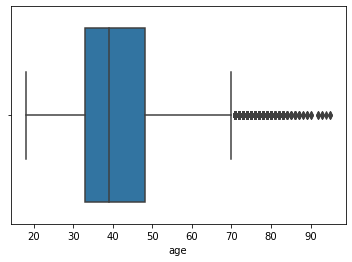

In [7]:
sns.boxplot(bank_df['age'])
plt.show()

`People above the age of 70 are outliers`

`Age column has some outliers. The median age is about 40 years. There are some customers above 90 years of age. This data might have to be checked`

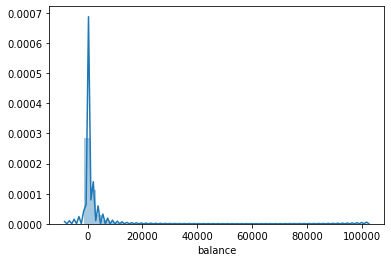

In [8]:
sns.distplot(bank_df['balance'])
plt.show()

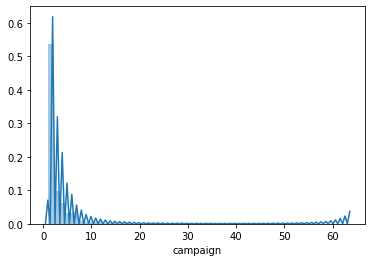

In [9]:
sns.distplot(bank_df['campaign'])
plt.show()

`Binning to be done for both the columns 'balance' and 'campaign'`

In [10]:
bank_df[bank_df['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


`this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model`

In [11]:
bank_df.drop(['duration'], inplace=True, axis=1)

**Non numerical columns**

In [12]:
for i in bank_df.columns[bank_df.dtypes=='object']:
    print(i,":")
    print()
    print(bank_df[i].value_counts(normalize=True)*100)
    print()
    print()

job :

blue-collar     21.53
management      20.92
technician      16.80
admin.          11.44
services         9.19
retired          5.01
self-employed    3.49
entrepreneur     3.29
unemployed       2.88
housemaid        2.74
student          2.07
unknown          0.64
Name: job, dtype: float64


marital :

married    60.19
single     28.29
divorced   11.52
Name: marital, dtype: float64


education :

secondary   51.32
tertiary    29.42
primary     15.15
unknown      4.11
Name: education, dtype: float64


default :

no    98.20
yes    1.80
Name: default, dtype: float64


housing :

yes   55.58
no    44.42
Name: housing, dtype: float64


loan :

no    83.98
yes   16.02
Name: loan, dtype: float64


contact :

cellular    64.77
unknown     28.80
telephone    6.43
Name: contact, dtype: float64


month :

may   30.45
jul   15.25
aug   13.82
jun   11.81
nov    8.78
apr    6.49
feb    5.86
jan    3.10
oct    1.63
sep    1.28
mar    1.06
dec    0.47
Name: month, dtype: float64


poutcome :

u

`We can drop poutcome as most of the values are unknown`

`Target is imbalanced but there is no need to treat it as 'yes' class is around 11%, we treat for imbalanced data when one class is very low`

In [13]:
bank_df.drop(['poutcome'], inplace=True, axis=1)

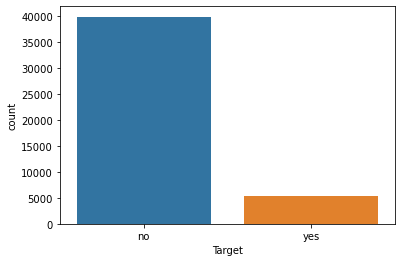

In [14]:
sns.countplot(bank_df['Target'])
plt.show()

In [15]:
bank_df['Target'].value_counts(normalize=True)

no    0.88
yes   0.12
Name: Target, dtype: float64

`The response rate is only 11.6%. Hence the Y variable has a high class imbalance. Hence accuracy will not be a reliable model performance measure.`

`FN is very critical for this business case because a false negative is a customer who will potentially subscribe for a loan but who has been classified as 'will not subscribe'. Hence the most relevant model performance measure is recall`

### Bivariate analysis

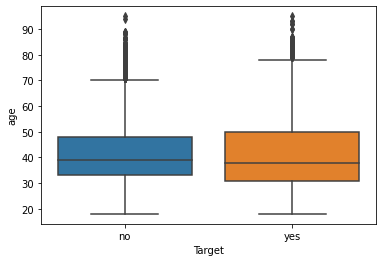

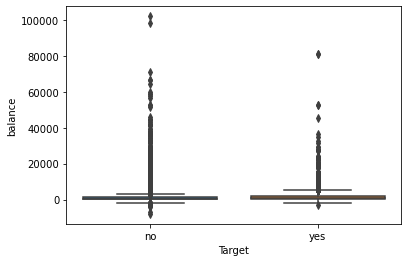

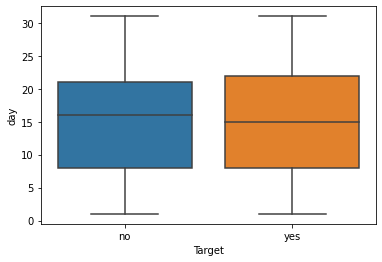

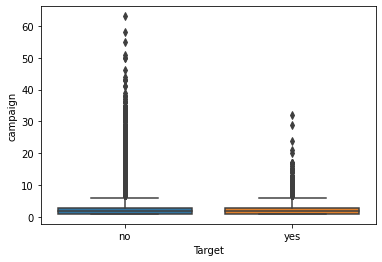

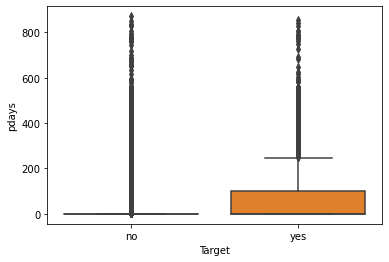

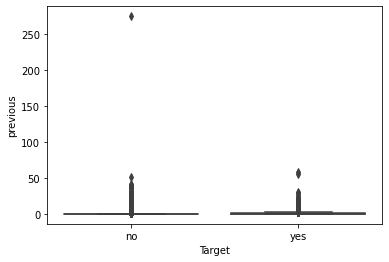

In [16]:
for i in ['age','balance','day','campaign','pdays','previous']:
    sns.boxplot(x='Target',y=i,data=bank_df)
    plt.show()

`Campaign values are higher for people saying no to term deposits i.e. people saying yes to term deposits have less number of contact during the campaign`

In [17]:
#Group numerical variables by mean for the classes of Y variable
np.round(bank_df.groupby(["Target"]).mean() ,1)

,age,balance,day,campaign,pdays,previous
Target,,,,,,
no,40.80,"1,303.70",15.90,2.80,36.40,0.50
yes,41.70,"1,804.30",15.20,2.10,68.70,1.20


`The mean balance is higher for customers who subscribe to the term deposit compared to those who dont`


`Number of days that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed`

`Number of contacts performed before this campaign is also higher for customers who subscribe`

`All of the above facts indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit`

**Bivariate analysis using crosstab for categorical values**

In [18]:
pd.crosstab(bank_df['job'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
job,,
student,0.71,0.29
retired,0.77,0.23
unemployed,0.84,0.16
management,0.86,0.14
admin.,0.88,0.12
self-employed,0.88,0.12
unknown,0.88,0.12
technician,0.89,0.11
services,0.91,0.09


#### The highest conversion is for students (28%) and lowest is for blue-collar(7%

In [19]:
pd.crosstab(bank_df['marital'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
marital,,
single,0.85,0.15
divorced,0.88,0.12
married,0.90,0.10


In [20]:
pd.crosstab(bank_df['education'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
education,,
tertiary,0.85,0.15
unknown,0.86,0.14
secondary,0.89,0.11
primary,0.91,0.09


In [21]:
print(pd.crosstab(bank_df['default'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False ))
print()
print(bank_df['default'].value_counts(normalize=True))

Target    no  yes
default          
no      0.88 0.12
yes     0.94 0.06

no    0.98
yes   0.02
Name: default, dtype: float64


`Since default - yes is only 2% of the data and the conversion is also comparitively lower for default - yes, we can remove this column`

In [22]:
bank_df.drop(['default'], axis=1, inplace=True)

In [23]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'Target'],
      dtype='object')

In [24]:
pd.crosstab(bank_df['housing'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
housing,,
no,0.83,0.17
yes,0.92,0.08


In [25]:
pd.crosstab(bank_df['loan'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
loan,,
no,0.87,0.13
yes,0.93,0.07


In [26]:
pd.crosstab(bank_df['contact'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
contact,,
cellular,0.85,0.15
telephone,0.87,0.13
unknown,0.96,0.04


In [27]:
pd.crosstab(bank_df['month'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
month,,
mar,0.48,0.52
dec,0.53,0.47
sep,0.54,0.46
oct,0.56,0.44
apr,0.80,0.20
feb,0.83,0.17
aug,0.89,0.11
jun,0.90,0.10
nov,0.90,0.10


## Deliverable – 2 (Prepare the data for analytics)

In [28]:
# Not a necessary step, but it helps having more categorical variables when target is categorical


#Binning balance

bin_edges=[-8020,0,72,448,1428,102128]
# first value is min value -1 of the column and last value is max +1  of the column, so that all values are included
# you can choose middle value on your own or select 25th, 50th and 75th percentile value
bin_names=['very low','low','medium','high','very high']
# Names of each bin or category
bank_df['balance'] = pd.cut(bank_df['balance'],bin_edges,labels=bin_names)

In [29]:
# Not a necessary step, but it helps having more categorical variables when target is categorical

#Binning Campaign

bin_edges=[0,2,3,4,564]
# first value is min value -1 of the column and last value is max +1  of the column, so that all values are included
# you can choose middle value on your own or select 25th, 50th and 75th percentile value
bin_names=['<=2','3', '4','>=4']
# Names of each bin or category
bank_df['campaign'] = pd.cut(bank_df['campaign'],bin_edges,labels=bin_names)

In [30]:
bank_df['Target'] = bank_df['Target'].map({'yes':1, 'no':0})

In [31]:
# Separating independent and dependent variables

X = bank_df.drop("Target" , axis=1)
y = bank_df["Target"]   

X = pd.get_dummies(X, drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [33]:
X_train.shape,X_test.shape

((31647, 42), (13564, 42))

## Deliverable – 3 (create the ensemble model)

## 1.

In [34]:
algo= []
tr = []
te = []
recall = []
precision = []
roc = []

# Blanks list to store model name, training score, testing score, recall, precision and roc

**Logistic Regression**

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score
model = LogisticRegression(random_state=7)

model.fit(X_train, y_train)

algo.append('Logistic Regression')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

**Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier
#instantiating decision tree as the default model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
#training acuracy
dt_model.score(X_train, y_train)

0.9985464656997504

In [38]:
#testing acuracy
dt_model.score(X_test, y_test)

0.836626363904453

`Model is an overfit as testing score is less than training score`

**Note: -** `Decision Tree is a non-parametric algorithm and hence prone to overfitting easily. This is evident from the difference in scores in training and testing. In ensemble techniques, we want multiple instances (each different from the other) and each instance to be overfit!!! hopefully, the different instances will do different mistakes in classification and when we club them, their# errors will get cancelled out giving us the benefit of lower bias and lower overall variance errors.`

In [39]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 7, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

In [40]:
## Calculating feature importance
feature_cols = X_train.columns

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

,0
contact_unknown,0.40
pdays,0.32
housing_yes,0.20
month_mar,0.04
month_oct,0.02
month_nov,0.01
day,0.01
month_feb,0.00
balance_very high,0.00
loan_yes,0.00


In [41]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)


In [42]:
print("Training Accuracy:",accuracy_score(y_train, preds_pruned_train))
print()
print("Training Accuracy:",accuracy_score(y_test, preds_pruned))
print()
print("Recall:",recall_score(y_test, preds_pruned, average="binary", pos_label=1))

Training Accuracy: 0.8816949473883781

Training Accuracy: 0.8867590681214981

Recall: 0.012385919165580182


`Overfitting is reduced after pruning, but recall has drastically reduced`

In [43]:
# Decision Tree Classifier using entropy, adding the values in the list

model = DecisionTreeClassifier(criterion = "entropy", random_state = 7, max_depth=3, min_samples_leaf=5)

model.fit(X_train, y_train)

algo.append('Decision Tree entropy')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

In [44]:
# Decision Tree Classifier using gini, adding the values in the list

model = DecisionTreeClassifier(criterion = "gini", random_state = 7, max_depth=3, min_samples_leaf=5)

model.fit(X_train, y_train)

algo.append('Decision Tree gini')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

## 2.

In [45]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=7, n_estimators=50)

model.fit(X_train, y_train)

algo.append('Random Forest')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

In [46]:
# Bagging
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=7,n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True)

model.fit(X_train, y_train)

algo.append('Bagging')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

In [47]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=7,n_estimators= 200, learning_rate=0.1)

model.fit(X_train, y_train)

algo.append('AdaBoost')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

In [48]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=7, n_estimators=200,)

model.fit(X_train, y_train)

algo.append('Gradient Boosting')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

In [49]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results

,Training Score,Testing Score,Recall,Precision,ROC AUC Score
Model,,,,,
Logistic Regression,0.88,0.89,0.10,0.50,0.54
Decision Tree entropy,0.88,0.89,0.01,0.47,0.51
Decision Tree gini,0.88,0.89,0.03,0.48,0.51
Random Forest,1.00,0.89,0.19,0.49,0.58
Bagging,0.99,0.89,0.23,0.49,0.60
AdaBoost,0.88,0.89,0.04,0.52,0.52
Gradient Boosting,0.90,0.89,0.21,0.54,0.59


**Confusion matrix means**

*True Positive (observed=1,predicted=1):*

Customer subscribed to term deposit and model predicted that the customer will

*False Positive (observed=0,predicted=1):*

Customer did not subscribe to term deposit and model predicted that the customer will

*True Negative (observed=0,predicted=0):*

Customer did not subscribe to term deposit and model predicted that the customer won't

*False Negative (observed=1,predicted=0):*

Customer subscribed to term deposit and model predicted that the customer won't

Here the company wants more people to subscribe to term deposits. So if we have a customer who is willing to subscribe then we shouldn't loose that customer. Therefore focus shpould be on False negative. Decreasing FN and increasing recall.

### Bagging gives overall best model performance. However, please note that the recall is still very low and will have to be improved